Exercise 1 is in a seperate document this week, since I didn't know how to integrate it. Will figure that out till next week :)

In [1]:
import numpy as np

def rsquare(y, ypredict):
    return 1-np.sum((y-ypredict)**2)/np.sum((y-np.mean(y))**2)

def MSE(y, ypredict):
    return 1/len(y)*(y.T-ypredict.T) @ (y-ypredict)


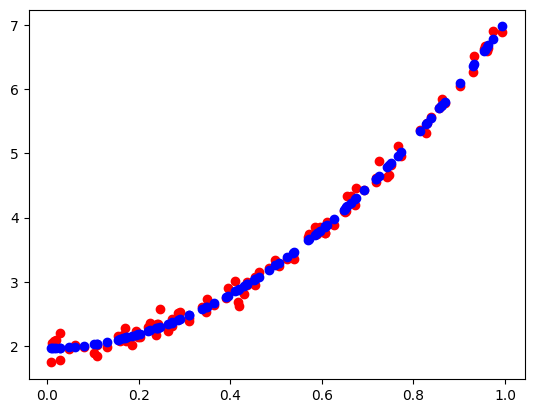

In [2]:
# Exercise 2.1 + partly 2.3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Input
x=np.random.rand(100,1)
# Observations
y = 2.0+5*x**2+0.1*np.random.randn(100,1)
# Designmatrix X
X=np.column_stack((x**0,x,x**2))

# inverse with np.linalg.inv( ) for matrices > 1x1
beta= np.linalg.inv(X.T @ X) @ X.T @ y
ypredict=X @ beta

MSE_selfmade = MSE(y, ypredict)
rsquare_selfmade = rsquare(y, ypredict)
plt.plot(x, y, 'ro')
plt.plot(x,ypredict, 'bo')


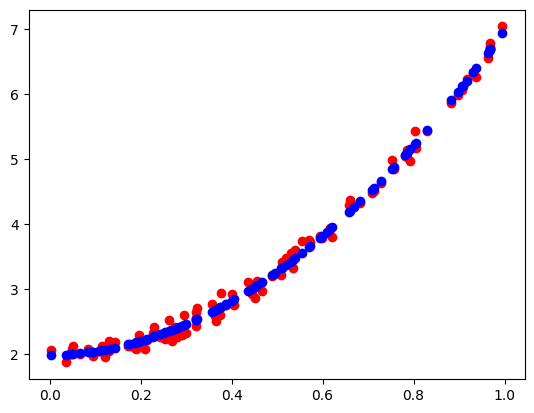

In [3]:
# Exercise 2.2 + partly 2.3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Input
x = np.random.rand(100,1)
# Observations
y = 2.0+5*x**2+0.1*np.random.randn(100,1)

model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression(fit_intercept=False))
clf = model.fit(x,y)
ypredict = clf.predict(x)

plt.plot(x, y, 'ro')
plt.plot(x,ypredict, 'bo')

MSE_sklearn = MSE(y, ypredict)
rsquare_sklearn = rsquare(y, ypredict)

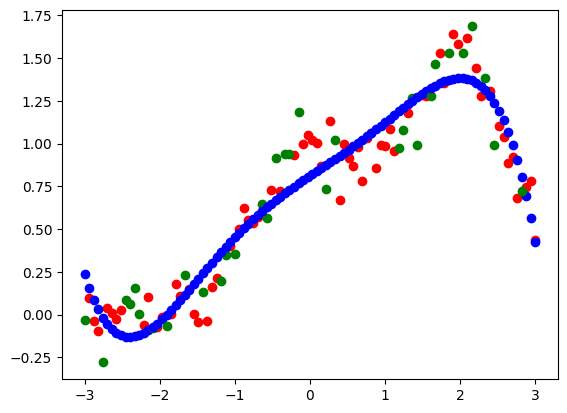

In [4]:
# Exercise 3a+b

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

np.random.seed()
n = 100
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

X=np.column_stack((x**0,x,x**2,x**3,x**4,x**5))

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

x = X_train[:,1].reshape((len(X_train)),1)
model = make_pipeline(PolynomialFeatures(degree=5), LinearRegression(fit_intercept=False))
clf = model.fit(x,y_train)
ypredict = clf.predict(x)

MSE_train = MSE(y_train, ypredict)

plt.plot(x, y_train, 'ro')
plt.plot(x,ypredict, 'bo')

ypredict_test = clf.predict(X_test[:,1].reshape((len(X_test)),1))
MSE_test = MSE(y_test, ypredict_test)

plt.plot(X_test[:,1], y_test, 'go')
plt.plot(X_test[:,1], ypredict_test, 'bo')


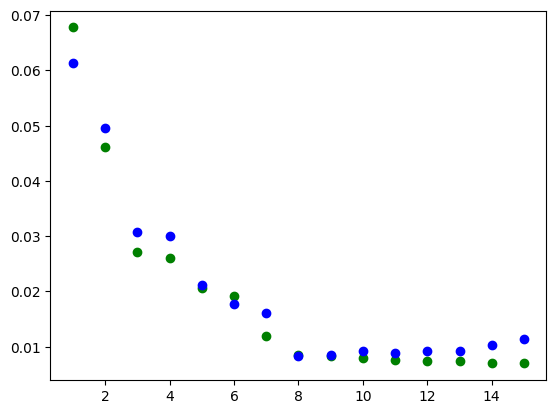

In [5]:
# Exercise 3c

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

np.random.seed()
n = 100
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

degree = np.arange(1, 16)

# tried for loop but had this dimension problem: could not broadcast input array from shape (1000,1) into shape (1000,)
# X = np.zeros((n,len(degree)+1))
# for i in range(0,len(degree)):
#   X[:,i] = x**i

#X=np.column_stack((x**0,x,x**2,x**3,x**4,x**5,x**6,x**7,x**8,x**9,x**10,x**11,x**12,x**13,x**14,x**15))
X = np.column_stack([x**i for i in range(0,16)])

MSE_train = np.zeros(len(degree))
MSE_test = np.zeros(len(degree))

for i in range(1,16):
    X_tilde = X[:,0:(i+1)]

    X_train, X_test, y_train, y_test = train_test_split( X_tilde, y, test_size=0.33, random_state=42)

    x = X_train[:,1].reshape((len(X_train)),1)
    model = make_pipeline(PolynomialFeatures(degree=i), LinearRegression(fit_intercept=False))
    clf = model.fit(x,y_train)
    ypredict = clf.predict(x)

    MSE_train[i-1] = MSE(y_train, ypredict)

    ypredict_test = clf.predict(X_test[:,1].reshape((len(X_test)),1))
    MSE_test[i-1] = MSE(y_test, ypredict_test)

plt.plot(degree, MSE_train, 'go')
plt.plot(degree, MSE_test, 'bo')


# The MSE-test is optimal at d=8